<hr style="height:2px;border:none" />
<h1><center> Engineering Tripos Part IIA Module Experiment: 3C6 </center></h1> 
<h1><center> Digital Vibration Analysis, South Wing Mechanics Laboratory </center></h1>
<hr style="height:2px;border:none" />

## Objectives

-  To investigate alternative methods of determining calibrated frequency response transfer functions of a mechanical vibrating system, using a digital measuring system;
-   To predict the response of a system from measured responses of its decoupled subsystems, and to compare with the measured response of the coupled system.

## Introduction

Problems involving vibration occur in every area of mechanical engineering, such as wave loading of offshore platforms, cabin noise in aircraft, performance of machine tools, and design of loudspeakers. To tackle such problems, one generally needs a combination of theoretical modelling and measurement. Theoretical modelling may take the form of simple analytical calculations, but is more likely to involve computer packages (for example to perform finite-element calculations).

Most vibration measurements also involve computers. A force of some kind is applied to the structure, and signals corresponding to this driving force and the response of the structure are sampled at regular intervals using an analogue-to-digital converter, so that they are represented in the computer by vectors of discrete values. This operation is usually described as “data-logging”. These sampled signals can then be processed to yield frequency response functions, vibration resonance frequencies, damping factors, mode shapes, and other more complicated quantities such as fatigue life predictions. The fundamental building block in any such analysis is the transfer function between a force applied at one point on the structure and the response (displacement, velocity or acceleration) at another point. The main approaches to the determination of vibration transfer functions are illustrated in this experiment.

_Note on jargon: a confusing array of different names is used to describe such transfer functions. We will use “(mechanical) admittance”, based on an analogy between mechanical and electrical systems. This is defined to be the ratio of velocity response to force, at a given frequency. Velocity is the natural response variable for many purposes, because it is the “energy conjugate” of force — force times velocity at the driven point gives the rate of doing work, just as does voltage times current. Another common name for admittance is “mobility”._

## Apparatus

The apparatus comprises a mechanical vibrating system, actuators to apply controlled forces to it, a sensor to measure the response, a data-logging computer with analysis software, and some miscellaneous electronic instrumentation. The vibrating system consists of two flexible cantilever beams, fixed to a heavy base. The base rests on soft rubber feet, to minimise the pick-up of background vibration transmitted through the floor and bench. An electromagnetic shaker (moving-coil actuator, constructed like a normal loudspeaker) can be coupled to the lower beam using a magnetic attachment. The two beams may be coupled together by wedging a small brass rod between the two beams. There is enough contact pressure to ensure that the beams remain in good contact for the purposes of vibration transmission.

Force can also be applied to the structure impulsively, using an instrumented hammer. This has a piezoelectric force transducer built into it, so that the precise waveform of force can be determined. The signal from this transducer is buffered by a suitable charge amplifier. The hammer has a soft tip which has the effect of limiting the frequency content of the impulse to a maximum of about 800Hz. The charge amplifiers used in this experiment have a low-frequency cutoff of 8 Hz. This makes vibration measurement easier by rapidly removing any DC drift or offset.

Vibration response is measured using an accelerometer mounted on a magnetic base. It can be placed on the top or bottom beam as required. The signal from the accelerometer passes through a charge amplifier, and is then integrated by analogue circuitry to produce an output proportional to velocity at the measurement point. In this experiment the accelerometer should always be placed as near as possible to the point on the structure at which the driving force is applied — this is achieved by placing it on the opposite side to the force-application point, in line with it. In this way, all your measurements will be of driving-point admittance.

Signals corresponding to the force and the velocity response go to the PC, which is used to perform data logging and analysis via a Python package, which this notebook uses. The person who logs in will hold all saved files. Make sure your file quota is not near its limit before you begin! If the power is not on at the benches, turn on the switches on the pillar at the north end of the bench, labelled “computers” and “bench sockets”. You may need to plug in the two BNC cables carrying your input and output signals to the diecast box at the rear of the computer trolley. Your cables are labelled “3C6 CH1” and “3C6 CH2”, to be plugged into the corresponding channels.

Magnets are not really the best way to attach accelerometers to a structure. As in this experiment they can be very convenient, but they have two major disadvantages. Firstly, the contact force is quite small (compared with a bolted or glued connection) and this causes problems if the acceleration levels are high. The second problem is that heavy magnets should not be used on light structures since the added mass will seriously modify the vibration characteristics of the structure, at the very least by lowering natural frequencies. You will observe this effect in this experiment and you should comment on it.

***
__When using the magnets make sure they are well seated. If they are not, you will hear buzzing or rattling. Remove the magnet and wipe both surfaces with your finger to remove any grit. Moving the magnet slightly is often all that is needed to get rid of the buzz. If the buzz persists, try using a lower vibration level.__
***

## Experimental procedure

For the first part of the experiment you will explore the frequency response of the cantilever system using a sine-wave generator, much as you did in the Part IA vibration experiment. The computer will be used only to collect the results and plot them. Attach the shaker to the bottom beam using the magnetic connector and insert the brass coupling rod between the two beams if it is not already there. Attach the accelerometer to the top beam directly above the coupling rod. Set the selector switch to “Sine”. Now go to the computer. On the Desktop double click on the “Matlab” icon, to launch the Matlab environment. When the Matlab Command Window appears, type “sinesweep” there and press “Enter”. A window will appear, allowing data points to be measured and plotted. Now use the sine-wave generator to explore the system response in the frequency range 0–500 Hz. For each frequency tested, watch the oscilloscope display to be sure that the vibration has settled to a steady state, then click the “Measure” button on the computer. The input and output signals will be sampled, and a dot will be plotted on the screen showing the corresponding value of the admittance function. As is usual in vibration measurements, the results are plotted with a logarithmic vertical scale, in decibels (dB). Actually the admittance function is complex (or equivalently each value has a phase shift associated with it), and what is plotted here is the magnitude of the admittance.

You can explore up and down in frequency at will, until you have dotted out a reasonable picture of the admittance (you should find at least four resonance peaks). Unwanted data points can be deleted using the “Delete last point” button. Be particularly careful to catch the peak values, where the system has resonances. You need not print the results at this stage: a better opportunity will arise later, when you will be able to print these results superimposed on other measurements of the admittance. When you have gathered sufficient data points, click on the "Save and quit" button, and the program will prompt for a file name, save your results and terminate. You don’t need to plot the results at this stage, you will read your results back in later and plot them then.

__Any files you save during this experiment should be put in your own file space on the central computer network: this space is mounted as the drive z: when you logged in to the Teaching System. Do not put files on the local disk of the PC you are using. Make sure you avoid file names containing a dot! Windows doesn’t like them.__

Start by importing the necessary modules (pydvma is a python package written for data acquisition at CUED).

Remember:

* to actually run a cell of code, click inside the cell then press 'shift+enter'
* the cell is running while [ * ] is displayed
* the cell has finished running when it changes to a number

In [1]:
%gui qt5

In [2]:
import pydvma as dvma
import lab_3c6
import matplotlib

In [3]:
matplotlib.use('nbagg')

### Stepped sine test

Choose your acquisition settings. The settings for this part of the 3C6 lab are:

* channels=2 (number of channels to record)
* fs=3000 (sampling rate in Hz)
* chunk_size=100 (how many samples to collect at a time, effectively controls refresh rate of oscilloscope)
* stored_time=1 (time in seconds to record data for)
* viewed_time=1 (time in seconds to display on oscilloscope)
* device_driver = 'nidaq'
* device_index = 0

In [ ]:
# acquisition setup
default_settings = dvma.MySettings(channels=2,
                           fs=3000,
                           chunk_size=100,
                           stored_time=0.5,
                           viewed_time=0.5,
                           device_driver = 'soundcard',
                           device_index=1)
settings = default_settings

Now open an oscilloscope using your settings. This shows three plots:

* the top one is like a normal oscilloscope showing the signal (toggle on/off with 'T');
* the middle one shows the frequency spectrum of the signal (toggle on/off with 'F');
* the bottom one shows the signal amplitudes (toggle on/off with 'L');

In [ ]:
# open oscilloscope
osc = dvma.Oscilloscope(settings)

In this part of the lab we want to measure the gain and phase shift from input to output at the specific frequencies of the generator.

In [ ]:
# log data
log_stepped_sine = lab_3c6.measure_stepped_sine(settings)

__Make sure you remembered to save both the data and the figure!__

You will need the data later: to check that you have saved it, you can reload and replot it. Note that the individual points are now plotted as a continuous line.

In [ ]:
data_stepped_sine = dvma.load_data()
data_stepped_sine.plot_tf_data()

### Noise input

The sine-wave method of obtaining the admittance, as you will now know, is laborious and not particularly accurate unless considerable care is taken. An improvement is to employ a forcing signal which contains the whole range of frequencies simultaneously, and to use Fourier analysis to sort out both the input and output signals into frequency components, and thus to obtain the transfer function. One kind of forcing signal which has a broad range of frequency components is random noise. Switch to “Noise” on the selector, and you will hear the sound of the cantilever system responding to such a signal, generated by an analogue noise generator.

You can bring up the oscilloscope at any time using:

In [ ]:
osc = dvma.Oscilloscope(settings)

We will explore the effect of some different logging options: first change the settings to store 2 seconds of data, then open the interactive logger:

1. Press 'Log Data' to log data using the specified settings
* You should have a single measurement, shown as two lines in the figure.
* If you have made more measurements then use the 'Delete Last Measurement' button until you just have one measurement left.
* Press 'Save Fig' to save the plot to disk
* Press 'FFT' to calculate the FFT using the window function specified beneath it: the default 'hanning' is appropriate here
* Press 'Save Fig' to save the plot to disk
* Press 'Plot TF' to calculate the Transfer Function: the default window 'hanning' and N_frames=1 are appropriate here.
* We don't need 'Plot TF av' yet: this will be used later
* Press 'Save Fig' to save the plot to disk
* Press 'Save Dataset' to save all the data to disk (it will save the data that has been calculated so far)    

In [ ]:
# acquisition setup
settings = default_settings
settings.stored_time = 10
logger = dvma.InteractiveLogging(settings, test_name = 'noise_input_' + str(settings.stored_time) + 's')

__Remember to save your data and figures to the teaching system__

Next repeat the steps using the interactive logger above, but logging for 30 seconds instead. You will need to change the settings line above to 'settings.stored_time=30'

We can compare the transfer functions from the two measurements using the interactive viewer:
* Press 'Load Data' and open your data from the 2 second noise test
* Press 'Load Data' and open your data from the 30 second noise test
* Press 'View TF' to compare the datasets from the two measurements

__Remember to save your data and figures to the teaching system__

In [ ]:
viewer = dvma.InteractiveView()

To smooth out the transfer functions we can average the data: recall that the transfer function is given by:

$$G(\omega) = \frac{E[YX^*]}{E[XX^*]}$$

where $X$ and $Y$ are the FFTs of the input and output respectively, and $E[\cdot]$ denotes the expectation (or average). If we take the whole time series then no averages are taken. But we can split the time data into sections (or 'frames'), calculate the FFT of each frame, then take the averages of those.

* Press 'Load Data' and find the 30 second noise data file
* Press 'Calc TF'
* Use the 'N_frames' slider to investigate the effect of averaging with different numbers of frames
* Save plots for the cases N=1, N=30 and your choice of N that gives the 'best' transfer function estimate

In [ ]:
# Load interactive tool to investigate N_frames
logger = dvma.InteractiveLogging(settings)

### Hammer input

There is an entirely different kind of forcing signal which contains a broad range of frequencies. This arises if you excite the structure impulsively with a short pulse. This could be done using the shaker, but it is more naturally done using a hammer. Remove the magnet and rod which attaches the shaker to the beams, then move the accelerometer to the underneath of the beams to the position where this coupling was previously attached. Switch the selector to “Hammer”. 

You can now capture the response of the system to a gentle tap with the instrumented hammer: tap on the top of the beams vertically above the accelerometer. Provided you tap within 20 s of starting logging, the computer will detect the moment when your input signal (the hammer force) exceeds a threshold value, and it will automatically save the signal starting just before this moment, by the 100 samples specified by the pretrigger variable.

__Data will be collected by the computer for 6 s: hold the hammer still until it is finished, and don’t put it down on the bench.__

__Check your hammer impulse in the time-domain display window. Is it clipped? Was there a single, clean impact or multiple impacts? Be prepared to practice your tapping technique until you get good results. Don't proceed until you've got a single clean impulse. Was there any vibration before the impulse? Make sure the beams were not still vibrating from a previous impulse. Did you hear any rattling or buzzing sounds? Try a lighter tap.__

The data logger converts voltages in the range $\pm 5$ V into discrete levels with 16-bit accuracy and normalises the $2^{16}$ bit integer to be in the range $-1<y<1$. If the sampled data are much less than about 0.1 (corresponding to 0.5 Volts), then some useful dynamic range has been wasted. But if the signal reaches 1 (5 Volts) then the signal has been clipped. This will produce nonlinearity in the frequency response. The program will warn you if either signal is clipped: repeat the measurement if so.

Before looking at the transfer function, it is always prudent to examine the time signals of both input and output, and you should do this. If you zoom in on the time signals, you will see the individual samples. Examine the hammer pulse in detail: find out how long it is, and comment in your write-up on what governs this length, and what influence it might have on the transfer function. Examine the signals, both input and output, before the hammer strike. They are probably slightly non-zero: are there different reasons for the input and the output?

Next, calculate frequency spectra with the FFT option (set window to None), and look at the spectra of input and output signals. What governs the form of the input spectrum? What force spectrum would you expect from an ideal impulse? Why does the spectrum tail off at high frequencies? Why does it tail off at low frequencies? 

Obtain a transfer function to compare with those obtained by the earlier methods. You should find that the result is satisfactory, with sharp clear peaks and troughs, without any need for averaging. If it is not, try again. You may have to develop your hammering technique a little to obtain best results. If you find it hard to get a clean transfer function then try moving the magnet, and checking that the brass coupling rod between the beams is well seated. It takes very little time to repeat the impulse response procedure. __You will find the write-up much easier with good data.__

Try measuring an averaged transfer function using the hammer: this time you will do this by averaging across each measurement, rather than dividing a single long measurement into frames. You should find that just two or three hammer taps are sufficient to produce excellent coherence in the frequency range up to 500 Hz.

__Remember to save your data and figures to the teaching system__

In [ ]:
# acquisition setup
settings = default_settings
settings.stored_time = 6
settings.pretrig_samples = 100
logger = dvma.InteractiveLogging(settings, test_name = 'hammer_input_' + str(settings.stored_time) + 's')

Now load the data from each of your previous measurements, and plot the transfer functions.

The most obvious difference should be that the hammer results are shifted vertically relative to the noise results. This is because the two input signals need different calibration factors. The computer can calculate an appropriate scale factor which would allow the peaks in the noise results to be scaled to fit those from the hammer: adjust the display window so that it shows a frequency range around the biggest two or three peaks, then use the option “Best match of 2 chans”. Find the Matlab Command Window, and it will show the answer. Use the option “Scale/calibrate” to apply this factor to the shaker signal.
Now compare the results from the three measurement methods. Use the option “Superimpose sine sweep results”, specifying the same scaling factor as just determined for the noise measurements. The three methods should now show good agreement at all the resonance peaks. You should see that there are one or more resonance peaks at low frequency in the admittance functions when measured using the hammer, but not when measured using the shaker. Can you explain why? Hint: notice that the shaker force is applied between the cantilevers and the base. Why is the hammer force different? What is the consequence?

In [ ]:
viewer = dvma.InteractiveView()

### Calibration

The final stage of the measurement is to calibrate your transfer functions to give results in physical
units. Move the accelerometer to the suspended mass behind the cantilevers. Use the hammer to
measure a good transfer function of this mass, swinging in a straight line. Log several measurements. Newton’s law
tells us that this transfer function should be very simple: the force should equal the mass times the
acceleration, and the mass (weight plus accelerometer) is given on a label on the apparatus: approximately 0.3 kg.

Your measured transfer function relates to velocity rather than acceleration,
so it must be converted. In the frequency domain, all that is needed is to multiply each point of the
transfer function by $i\omega$, using the appropriate angular frequency.

Plot the transfer function: it should now show a near-horizontal line over a range of frequencies. 

__Remember to save your data and figures to the teaching system__

In [ ]:
# acquisition setup
settings = default_settings
settings.stored_time = 6
settings.pretrig_samples = 100
logger = dvma.InteractiveLogging(settings, test_name = 'calibration_' + str(settings.stored_time) + 's')

Make your best estimate of the value of this constant level: to convert the decibal value back to a linear value note that

$$Y_\text{dB} = 20 \log_{10} \left|Y_\text{linear}\right|$$

Hence deduce the factor by which the measured transfer function must be multiplied in order to give a
calibrated result. Verify that your procedure is correct by loading your data, applying the factor you deduced and plotting the results:

In [ ]:
# load data
data_calibration = dvma.load_data()

In [ ]:
calibration_factor = 2
data_calibration.tf_data_list.set_calibration_factors(factors=[calibration_factor])

In [ ]:
data_calibration.plot_tf_data()

Now apply this factor (and where needed, the factor found in section 4.3) to convert the results
of all three measurements into calibrated units. Save or print the resulting graph, as the culmination
of this part of the experiment. What are the units of this calibrated admittance?

In [ ]:
data_hammer = dvma.load_data()

In [ ]:
data_hammer.tf_data_list.set_calibration_factors(factors=calibration_factor)

In [ ]:
data_hammer.save_data()

### Calibrated Comparison

Now load, calibrate and compare your data from all three measurements as the culmination of this part of the experiment. What are the units of this calibrated admittance?

1. Use 'Load Data' to load each of the datasets to be compared: __LOAD THE CALIBRATED HAMMER DATA FIRST.__
* Use 'View TF' to see the transfer function data.
* When all three transfer functions are shown, then zoom into a suitable frequency range where the data is reliable and press 'Match Amplitudes'. This finds and applies a calibration factor to match the amplitudes of the visible datasets to the amplitude of the first dataset: this is why you needed to load the calibrated hammer data first.

In [ ]:
viewer = dvma.InteractiveView()

### Coupling

Finally, the measurement of driving-point admittances can be used to learn something about the system behaviour. Using the hammer method, obtain admittances for the two cantilevers separately (by removing the coupling rod, removing the magnetic shaker attachment, and moving the accelerometer appropriately — you may need to practice your upside-down hammering technique!)

Use the interactive logger below with the 'Calc TF average' function for each beam, changing the 'test_name' as appropriate in each case. Get the best result you can, using a few averages. Save each transfer function in a file.

__Remember to save your data and figures to the teaching system__

In [ ]:
settings = default_settings
settings.stored_time = 6
settings.pretrig_samples = 100
logger = dvma.InteractiveLogging(settings, test_name = 'lower_beam')

Now you can use these measurements to predict the response of the coupled system: when the two cantilevers are coupled together, the motion at the coupling point must be the same, while the applied force is the sum of the forces applied to the two separate cantilevers. Thus the admittance of the coupled system is related to the admittances $Y_1(\omega)$, $Y_2(\omega)$ of the two separate systems by the formula:

$$\frac{1}{Y_\text{coupled}} = \frac{1}{Y_1(\omega)} + \frac{1}{Y_2(\omega)}$$

which will be familiar from, for example, parallel electrical resistances.

To calculate the coupled admittance using these measurements, load the data then use the lab_3c6.coupled_TF function:

In [4]:
data_lower = dvma.load_data()

In [5]:
data_upper = dvma.load_data()

In [ ]:
data_coupled = lab_3c6.coupled_TF(data_lower,data_upper)

In [7]:
data_coupled.save_data()

Data saved as C:/Users/tb267/Documents/GitHub/divc_labs/3C6/coupled.npy


'C:/Users/tb267/Documents/GitHub/divc_labs/3C6/coupled.npy'

Load the saved data using the interactive viewer. You can also compare the result with the earlier measurement of the actual coupled system, by loading in an earlier file. Comment on the accuracy of the result. Does this method give a reliable way to deduce the behaviour of coupled systems? If not, why not?

<IPython.core.display.Javascript object>


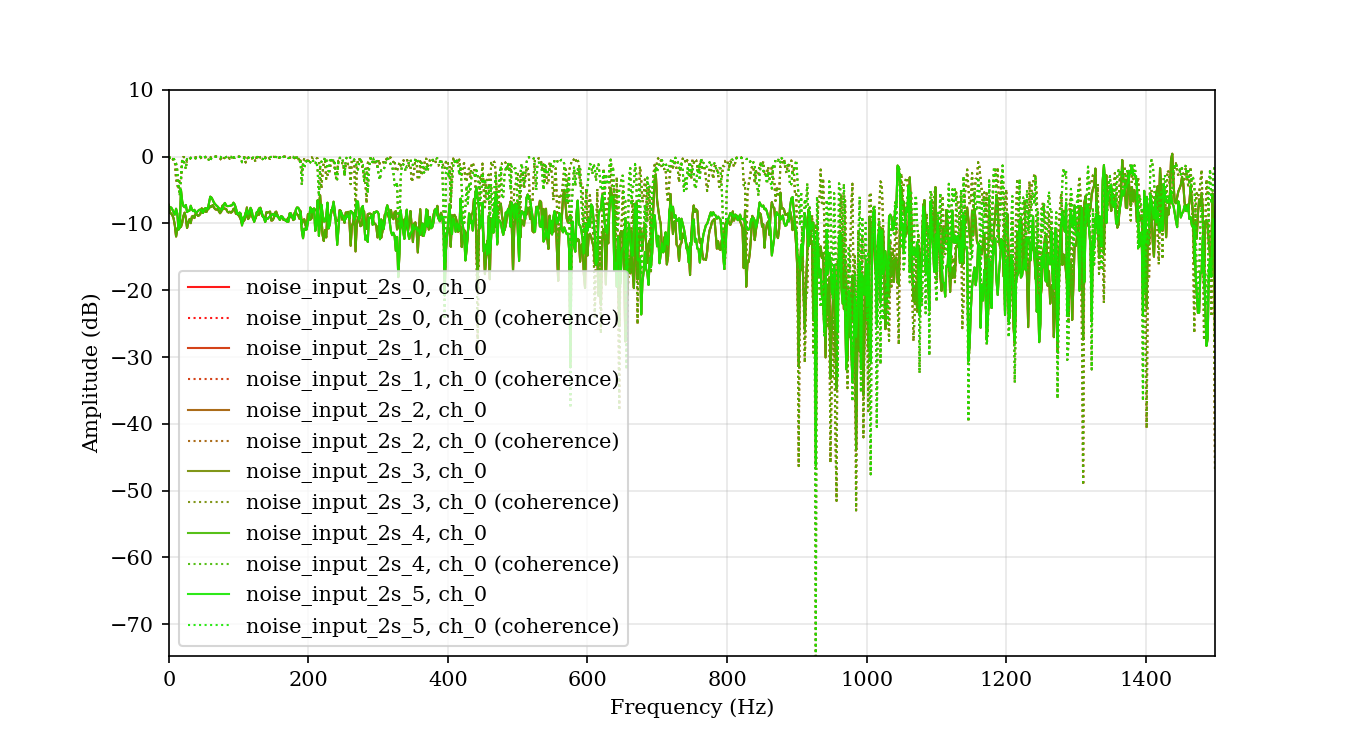

Output()

In [8]:
viewer = dvma.InteractiveView()

## Write-up for laboratory report (3 hours)

The write-up of this experiment as coursework for module 3C6 should be short: the text should occupy a maximum 5 A4 sides hand-written or 3 sides word processed, plus appropriate plots of experimental results. Your report should include representative results from all the stages of the experiment, including the final calibrated comparison of all measurement methods. It need only give a very brief description of the experimental procedure, but it should contain answers to the various questions asked in this sheet, and a critical discussion of the results which might take the form of short bullet points accompanying annotated plots of experimental results.

When writing up, please concentrate on the following:

* Use diagrams to illustrate your points and tables to summarise data.
* Label the plots carefully and identify interesting features (frequency and amplitude of peaks, units of vertical axis, unexpected glitches, etc.). Your plots should not end up looking just like everyone else's.
* Make sure you discuss the major features of the measured data (the main peaks, comparison between methods, validity of system-coupling theory).
* There is no need to regurgitate chunks of Part I material. Refer to such material in passing while making particular observations on measured data.
* This is primarily a vibration experiment. Concentrate on the 'vibration analysis' rather than the 'digital analysis'. The digital signal processing is a means to an end.

The report should be submitted online using the 3C6 Moodle page as a PDF file, within the usual time allowed for lab hand-ins. You should then attend the next available feedback session for discussion and to collect your marked report — please allow at least 24 hours for report marking between hand-in and attending a feedback session. Feedback sessions last for 30 minutes, and will be held on certain Friday afternoons. The feedback dates and locations are on the sign-up web page. Attendance at the feedback session is very strongly advised — but if you can’t make the designated session and there is a later one available, you can attend that instead. If you intend to submit an FTR on this experiment, you are strongly advised to do the experiment early enough in the term that you can attend a feedback session well before the FTR hand-in deadline.

## Write-up for Full Technical Report (10 additional hours)

Guidance on the preparation of Full Technical Reports is provided both in Appendix I of the General Instructions document and in the CUED booklet A guide to report writing, with which you were issued in the first year. The experimental plots from your Laboratory Report should be included. The written material from your Laboratory Report will be superseded by this fuller account, perhaps corrected in the light of information from the feedback session. Remember that this report will be assessed both on technical content and on quality of presentation.

The following additional questions should be discussed in your Full Technical Report:

1. Does the form of the transfer functions you have measured agree with what you expect based on the lecture notes for the module?
* What governs the shape of the force pulse from the hammer? How does this then determine the bandwidth of the frequency spectrum of the force? *Hint: look in the Electrical Data Book.* Why does the hammer have a rubber tip?
* How well do the measured and “predicted” admittances of the coupled cantilevers agree? Are the predicted frequencies the same? Are there other discrepancies? How do these discrepancies arise? How could the measurement procedure be improved to reduce discrepancies?
* What are the main advantages and drawbacks of the three approaches to forcing (sinusoidal, random and impulsive)? For each of the three, suggest a type of application for which it might be the best. Think about size, power, method of attachment, test speed, frequency range, signal-to-noise ratio .... Do not fall into the trap of thinking that the “best” test method is the one which has an input force “most similar” to the type of forcing in the real application — remember that provided linear theory is applicable, any type of input force should theoretically give the same transfer function.
* What do your measurements tell you about the damping of the cantilever system? *Hint: refer to your Mechanics Data Book.* Why might you expect more damping in the coupled system?

The report should be submitted online using the 3C6 Moodle page as a PDF file.